조금 더 정교하게 리밸런싱

In [1]:
import os
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from tools.portfolio import simulate_longonly
from tools.stats import print_statistics

In [2]:
price_df = pd.read_pickle("data/asset_cc2.pkl")
six_four = pd.read_pickle("data/6-4.pkl")
seven_three = pd.read_pickle("data/7-3.pkl")
eight_two = pd.read_pickle("data/8-2.pkl")

In [3]:
price_df_ = price_df.rename(
    {
        "snp":"SPX",
        "t10":"US10Y",
        "brent":"Brent",
        "dxy":"DXY",
        "gold":"Gold",
        "silver":"Silver",
    }, axis=1).loc[:, ["SPX","US10Y","Brent", "DXY", "Gold", "Silver"]]

In [16]:
a = '0.01'
with open(f"results/tau/result_weights_{a}.json", 'r', encoding='utf-8') as f:
    daily_weight = json.load(f)
    
daily_weight = pd.DataFrame(daily_weight).T
daily_weight.columns = price_df.columns
daily_weight.index = pd.to_datetime(daily_weight.index)

with open(f"results/tau/estimated_regime_{a}.json", 'r', encoding='utf-8') as f:
    regime = json.load(f)

b = [i for i in regime]

change_dict = {}

for inner_dict in regime:
    sorted_dates = sorted(inner_dict.keys())
    
    day1 = inner_dict[sorted_dates[-2]]
    day2 = inner_dict[sorted_dates[-1]]
    
    change = 0 if day1 == day2 else 1
    change_dict[sorted_dates[-2]] = change
    
change_series = pd.Series(change_dict)
change_series.index = pd.to_datetime(change_series.index)
change_series.sort_index(inplace=True)
change_date = change_series.loc[change_series==1].index

new_reb_dates = []
last_reb_date = daily_weight.index[0]
new_reb_dates.append(last_reb_date)

for date in daily_weight.index[1:]:
    # (A) 원래 리밸런싱 날짜라면
    if date in change_date:
        last_reb_date = date
        new_reb_dates.append(date)
        continue

    # (B) 마지막 리밸런싱 후 30일 이상 지났다면
    if (date - last_reb_date) >= pd.Timedelta(days=30):
        last_reb_date = date
        new_reb_dates.append(date)

# 최종 결과
new_reb_dates = pd.DatetimeIndex(new_reb_dates)
weight_resampled = daily_weight.loc[new_reb_dates]

weight_resampled = weight_resampled.rename(
    {
        "snp":"SPX",
        "t10":"US10Y",
        "brent":"Brent",
        "dxy":"DXY",
        "gold":"Gold",
        "silver":"Silver",
    }, axis=1).loc[:, ["SPX","US10Y","Brent", "DXY", "Gold", "Silver"]]


result_001 = simulate_longonly(
    group_weight_df=weight_resampled,
    price_df=price_df_,
    fee_rate=0.001,
)

In [17]:
a = '0.15'
with open(f"results/tau/result_weights_{a}.json", 'r', encoding='utf-8') as f:
    daily_weight = json.load(f)
    
daily_weight = pd.DataFrame(daily_weight).T
daily_weight.columns = price_df.columns
daily_weight.index = pd.to_datetime(daily_weight.index)

with open(f"results/tau/estimated_regime_{a}.json", 'r', encoding='utf-8') as f:
    regime = json.load(f)

b = [i for i in regime]

change_dict = {}

for inner_dict in regime:
    sorted_dates = sorted(inner_dict.keys())
    
    day1 = inner_dict[sorted_dates[-2]]
    day2 = inner_dict[sorted_dates[-1]]
    
    change = 0 if day1 == day2 else 1
    change_dict[sorted_dates[-2]] = change
    
change_series = pd.Series(change_dict)
change_series.index = pd.to_datetime(change_series.index)
change_series.sort_index(inplace=True)
change_date = change_series.loc[change_series==1].index

new_reb_dates = []
last_reb_date = daily_weight.index[0]
new_reb_dates.append(last_reb_date)

for date in daily_weight.index[1:]:
    # (A) 원래 리밸런싱 날짜라면
    if date in change_date:
        last_reb_date = date
        new_reb_dates.append(date)
        continue

    # (B) 마지막 리밸런싱 후 30일 이상 지났다면
    if (date - last_reb_date) >= pd.Timedelta(days=30):
        last_reb_date = date
        new_reb_dates.append(date)

# 최종 결과
new_reb_dates = pd.DatetimeIndex(new_reb_dates)
weight_resampled = daily_weight.loc[new_reb_dates]

weight_resampled = weight_resampled.rename(
    {
        "snp":"SPX",
        "t10":"US10Y",
        "brent":"Brent",
        "dxy":"DXY",
        "gold":"Gold",
        "silver":"Silver",
    }, axis=1).loc[:, ["SPX","US10Y","Brent", "DXY", "Gold", "Silver"]]

result_015 = simulate_longonly(
    group_weight_df=weight_resampled,
    price_df=price_df_,
    fee_rate=0.001,
)

In [18]:
a = '0.3'
with open(f"results/tau/result_weights_{a}.json", 'r', encoding='utf-8') as f:
    daily_weight = json.load(f)
    
daily_weight = pd.DataFrame(daily_weight).T
daily_weight.columns = price_df.columns
daily_weight.index = pd.to_datetime(daily_weight.index)

with open(f"results/tau/estimated_regime_{a}.json", 'r', encoding='utf-8') as f:
    regime = json.load(f)

b = [i for i in regime]

change_dict = {}

for inner_dict in regime:
    sorted_dates = sorted(inner_dict.keys())
    
    day1 = inner_dict[sorted_dates[-2]]
    day2 = inner_dict[sorted_dates[-1]]
    
    change = 0 if day1 == day2 else 1
    change_dict[sorted_dates[-2]] = change
    
change_series = pd.Series(change_dict)
change_series.index = pd.to_datetime(change_series.index)
change_series.sort_index(inplace=True)
change_date = change_series.loc[change_series==1].index

new_reb_dates = []
last_reb_date = daily_weight.index[0]
new_reb_dates.append(last_reb_date)

for date in daily_weight.index[1:]:
    # (A) 원래 리밸런싱 날짜라면
    if date in change_date:
        last_reb_date = date
        new_reb_dates.append(date)
        continue

    # (B) 마지막 리밸런싱 후 30일 이상 지났다면
    if (date - last_reb_date) >= pd.Timedelta(days=30):
        last_reb_date = date
        new_reb_dates.append(date)

# 최종 결과
new_reb_dates = pd.DatetimeIndex(new_reb_dates)
weight_resampled = daily_weight.loc[new_reb_dates]

weight_resampled = weight_resampled.rename(
    {
        "snp":"SPX",
        "t10":"US10Y",
        "brent":"Brent",
        "dxy":"DXY",
        "gold":"Gold",
        "silver":"Silver",
    }, axis=1).loc[:, ["SPX","US10Y","Brent", "DXY", "Gold", "Silver"]]

result_03 = simulate_longonly(
    group_weight_df=weight_resampled,
    price_df=price_df_,
    fee_rate=0.001,
)

In [19]:
a = '0.45'
with open(f"results/tau/result_weights_{a}.json", 'r', encoding='utf-8') as f:
    daily_weight = json.load(f)
    
daily_weight = pd.DataFrame(daily_weight).T
daily_weight.columns = price_df.columns
daily_weight.index = pd.to_datetime(daily_weight.index)

with open(f"results/tau/estimated_regime_{a}.json", 'r', encoding='utf-8') as f:
    regime = json.load(f)

b = [i for i in regime]

change_dict = {}

for inner_dict in regime:
    sorted_dates = sorted(inner_dict.keys())
    
    day1 = inner_dict[sorted_dates[-2]]
    day2 = inner_dict[sorted_dates[-1]]
    
    change = 0 if day1 == day2 else 1
    change_dict[sorted_dates[-2]] = change
    
change_series = pd.Series(change_dict)
change_series.index = pd.to_datetime(change_series.index)
change_series.sort_index(inplace=True)
change_date = change_series.loc[change_series==1].index

new_reb_dates = []
last_reb_date = daily_weight.index[0]
new_reb_dates.append(last_reb_date)

for date in daily_weight.index[1:]:
    # (A) 원래 리밸런싱 날짜라면
    if date in change_date:
        last_reb_date = date
        new_reb_dates.append(date)
        continue

    # (B) 마지막 리밸런싱 후 30일 이상 지났다면
    if (date - last_reb_date) >= pd.Timedelta(days=30):
        last_reb_date = date
        new_reb_dates.append(date)

# 최종 결과
new_reb_dates = pd.DatetimeIndex(new_reb_dates)
weight_resampled = daily_weight.loc[new_reb_dates]

weight_resampled = weight_resampled.rename(
    {
        "snp":"SPX",
        "t10":"US10Y",
        "brent":"Brent",
        "dxy":"DXY",
        "gold":"Gold",
        "silver":"Silver",
    }, axis=1).loc[:, ["SPX","US10Y","Brent", "DXY", "Gold", "Silver"]]

result_045 = simulate_longonly(
    group_weight_df=weight_resampled,
    price_df=price_df_,
    fee_rate=0.001,
)

In [20]:
a = '0.6'
with open(f"results/tau/result_weights_{a}.json", 'r', encoding='utf-8') as f:
    daily_weight = json.load(f)
    
daily_weight = pd.DataFrame(daily_weight).T
daily_weight.columns = price_df.columns
daily_weight.index = pd.to_datetime(daily_weight.index)

with open(f"results/tau/estimated_regime_{a}.json", 'r', encoding='utf-8') as f:
    regime = json.load(f)

b = [i for i in regime]

change_dict = {}

for inner_dict in regime:
    sorted_dates = sorted(inner_dict.keys())
    
    day1 = inner_dict[sorted_dates[-2]]
    day2 = inner_dict[sorted_dates[-1]]
    
    change = 0 if day1 == day2 else 1
    change_dict[sorted_dates[-2]] = change
    
change_series = pd.Series(change_dict)
change_series.index = pd.to_datetime(change_series.index)
change_series.sort_index(inplace=True)
change_date = change_series.loc[change_series==1].index

new_reb_dates = []
last_reb_date = daily_weight.index[0]
new_reb_dates.append(last_reb_date)

for date in daily_weight.index[1:]:
    # (A) 원래 리밸런싱 날짜라면
    if date in change_date:
        last_reb_date = date
        new_reb_dates.append(date)
        continue

    # (B) 마지막 리밸런싱 후 30일 이상 지났다면
    if (date - last_reb_date) >= pd.Timedelta(days=30):
        last_reb_date = date
        new_reb_dates.append(date)

# 최종 결과
new_reb_dates = pd.DatetimeIndex(new_reb_dates)
weight_resampled = daily_weight.loc[new_reb_dates]

weight_resampled = weight_resampled.rename(
    {
        "snp":"SPX",
        "t10":"US10Y",
        "brent":"Brent",
        "dxy":"DXY",
        "gold":"Gold",
        "silver":"Silver",
    }, axis=1).loc[:, ["SPX","US10Y","Brent", "DXY", "Gold", "Silver"]]

result_06 = simulate_longonly(
    group_weight_df=weight_resampled,
    price_df=price_df_,
    fee_rate=0.001,
)

In [21]:
a = '0.75'
with open(f"results/tau/result_weights_{a}.json", 'r', encoding='utf-8') as f:
    daily_weight = json.load(f)
    
daily_weight = pd.DataFrame(daily_weight).T
daily_weight.columns = price_df.columns
daily_weight.index = pd.to_datetime(daily_weight.index)

with open(f"results/tau/estimated_regime_{a}.json", 'r', encoding='utf-8') as f:
    regime = json.load(f)

b = [i for i in regime]

change_dict = {}

for inner_dict in regime:
    sorted_dates = sorted(inner_dict.keys())
    
    day1 = inner_dict[sorted_dates[-2]]
    day2 = inner_dict[sorted_dates[-1]]
    
    change = 0 if day1 == day2 else 1
    change_dict[sorted_dates[-2]] = change
    
change_series = pd.Series(change_dict)
change_series.index = pd.to_datetime(change_series.index)
change_series.sort_index(inplace=True)
change_date = change_series.loc[change_series==1].index

new_reb_dates = []
last_reb_date = daily_weight.index[0]
new_reb_dates.append(last_reb_date)

for date in daily_weight.index[1:]:
    # (A) 원래 리밸런싱 날짜라면
    if date in change_date:
        last_reb_date = date
        new_reb_dates.append(date)
        continue

    # (B) 마지막 리밸런싱 후 30일 이상 지났다면
    if (date - last_reb_date) >= pd.Timedelta(days=30):
        last_reb_date = date
        new_reb_dates.append(date)

# 최종 결과
new_reb_dates = pd.DatetimeIndex(new_reb_dates)
weight_resampled = daily_weight.loc[new_reb_dates]

weight_resampled = weight_resampled.rename(
    {
        "snp":"SPX",
        "t10":"US10Y",
        "brent":"Brent",
        "dxy":"DXY",
        "gold":"Gold",
        "silver":"Silver",
    }, axis=1).loc[:, ["SPX","US10Y","Brent", "DXY", "Gold", "Silver"]]

result_075 = simulate_longonly(
    group_weight_df=weight_resampled,
    price_df=price_df_,
    fee_rate=0.001,
)

In [22]:
a = '1'
with open(f"results/tau/result_weights_{a}.json", 'r', encoding='utf-8') as f:
    daily_weight = json.load(f)
    
daily_weight = pd.DataFrame(daily_weight).T
daily_weight.columns = price_df.columns
daily_weight.index = pd.to_datetime(daily_weight.index)

with open(f"results/tau/estimated_regime_{a}.json", 'r', encoding='utf-8') as f:
    regime = json.load(f)

b = [i for i in regime]

change_dict = {}

for inner_dict in regime:
    sorted_dates = sorted(inner_dict.keys())
    
    day1 = inner_dict[sorted_dates[-2]]
    day2 = inner_dict[sorted_dates[-1]]
    
    change = 0 if day1 == day2 else 1
    change_dict[sorted_dates[-2]] = change
    
change_series = pd.Series(change_dict)
change_series.index = pd.to_datetime(change_series.index)
change_series.sort_index(inplace=True)
change_date = change_series.loc[change_series==1].index

new_reb_dates = []
last_reb_date = daily_weight.index[0]
new_reb_dates.append(last_reb_date)

for date in daily_weight.index[1:]:
    # (A) 원래 리밸런싱 날짜라면
    if date in change_date:
        last_reb_date = date
        new_reb_dates.append(date)
        continue

    # (B) 마지막 리밸런싱 후 30일 이상 지났다면
    if (date - last_reb_date) >= pd.Timedelta(days=30):
        last_reb_date = date
        new_reb_dates.append(date)

# 최종 결과
new_reb_dates = pd.DatetimeIndex(new_reb_dates)
weight_resampled = daily_weight.loc[new_reb_dates]

weight_resampled = weight_resampled.rename(
    {
        "snp":"SPX",
        "t10":"US10Y",
        "brent":"Brent",
        "dxy":"DXY",
        "gold":"Gold",
        "silver":"Silver",
    }, axis=1).loc[:, ["SPX","US10Y","Brent", "DXY", "Gold", "Silver"]]

result_1 = simulate_longonly(
    group_weight_df=weight_resampled,
    price_df=price_df_,
    fee_rate=0.001,
)

In [23]:
snp = price_df_['SPX'].loc[result_1.index]
snp = snp / snp.iloc[0]

In [24]:
cc_dict = {
    "$\\tau = 0.01$": result_001.pct_change(),
    "$\\tau = 0.15$": result_015.pct_change(),
    "$\\tau = 0.30$": result_03.pct_change(),
    "$\\tau = 0.45$": result_045.pct_change(),
    "$\\tau = 0.60$": result_06.pct_change(),
    "$\\tau = 0.75$": result_075.pct_change(),
    "$\\tau = 1.00$": result_1.pct_change(),
    "S&P 500":snp.pct_change(),
}

stats_cc = print_statistics(cc_dict)
print(stats_cc.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
 & Mean & Std & Sharpe & Cum & Mdd \\
\midrule
$\tau = 0.01$ & 11.06 & 15.48 & 0.71 & 241.66 & 35.65 \\
$\tau = 0.15$ & 10.29 & 12.93 & 0.80 & 224.41 & 30.28 \\
$\tau = 0.30$ & 10.07 & 11.78 & 0.86 & 221.55 & 27.84 \\
$\tau = 0.45$ & 9.95 & 11.22 & 0.89 & 219.36 & 26.79 \\
$\tau = 0.60$ & 10.00 & 10.87 & 0.92 & 222.74 & 26.98 \\
$\tau = 0.75$ & 10.02 & 10.75 & 0.93 & 224.33 & 27.22 \\
$\tau = 1.00$ & 9.96 & 10.84 & 0.92 & 221.58 & 28.67 \\
S&P 500 & 14.62 & 24.34 & 0.60 & 326.55 & 56.77 \\
\bottomrule
\end{tabular}



In [25]:
pf_cum = (pd.DataFrame(cc_dict).fillna(0)+1).cumprod()
dd = (pf_cum - pf_cum.cummax()) / pf_cum.cummax()
pf_log = np.log(pf_cum)

(-0.59, 0.0)

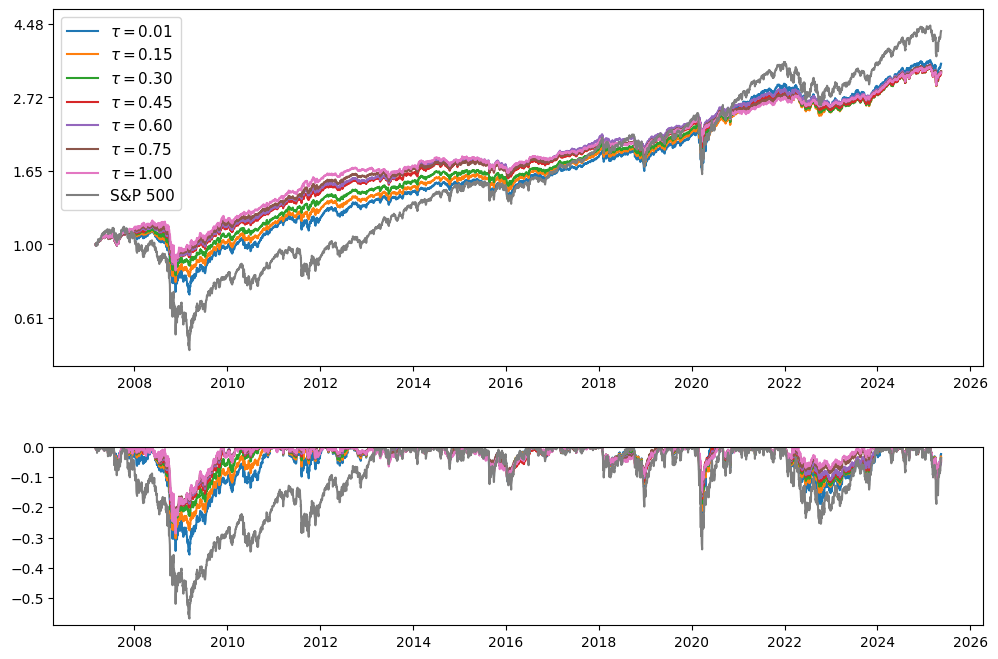

In [26]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[2, 1], hspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
for col in pf_log.columns:
    ax1.plot(pf_log.index, pf_log[col], label=col)
ax1.legend(loc='upper left', fontsize=11)

def y_fmt(log_val, pos):
    return f"{np.exp(log_val):.2f}"
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for col in dd.columns:
    ax2.plot(dd.index, dd[col], label=col)

ax2.set_ylim(-0.59, 0)

In [27]:
after_2016 = print_statistics(pd.DataFrame(cc_dict)["2016":])
print(after_2016.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
 & Mean & Std & Sharpe & Cum & Mdd \\
\midrule
$\tau = 0.01$ & 14.42 & 15.20 & 0.95 & 133.98 & 23.67 \\
$\tau = 0.15$ & 12.64 & 13.07 & 0.97 & 112.81 & 21.15 \\
$\tau = 0.30$ & 11.92 & 11.86 & 1.01 & 105.21 & 18.78 \\
$\tau = 0.45$ & 10.82 & 11.01 & 0.98 & 92.41 & 17.21 \\
$\tau = 0.60$ & 10.49 & 10.39 & 1.01 & 89.25 & 16.43 \\
$\tau = 0.75$ & 10.95 & 9.92 & 1.10 & 95.45 & 15.74 \\
$\tau = 1.00$ & 10.53 & 9.37 & 1.12 & 90.92 & 15.18 \\
S&P 500 & 19.10 & 22.34 & 0.85 & 189.49 & 33.92 \\
\bottomrule
\end{tabular}

